<a href="https://colab.research.google.com/github/Sakthifathi/VOIS_AICTE_Oct2025_Netfix-Data-Analysis_-SAKTHI-R-F-/blob/main/SAKTHI_R_F_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# =====================================
# 📊 Netflix Content Trends Analysis
# =====================================

# Step 1: Install Required Libraries
!pip install pandas matplotlib seaborn


Preview of Dataset:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...



Available Columns:
Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


/tmp/ipython-input-3057016855.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='coolwarm')


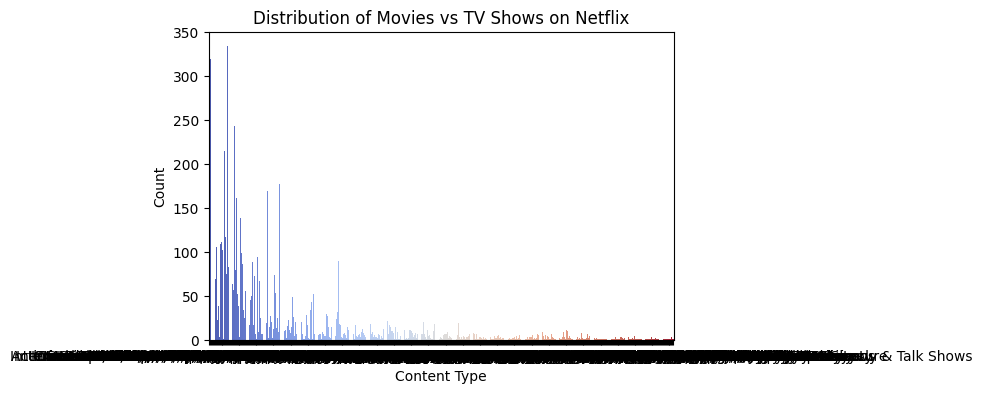

/tmp/ipython-input-3057016855.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='magma')


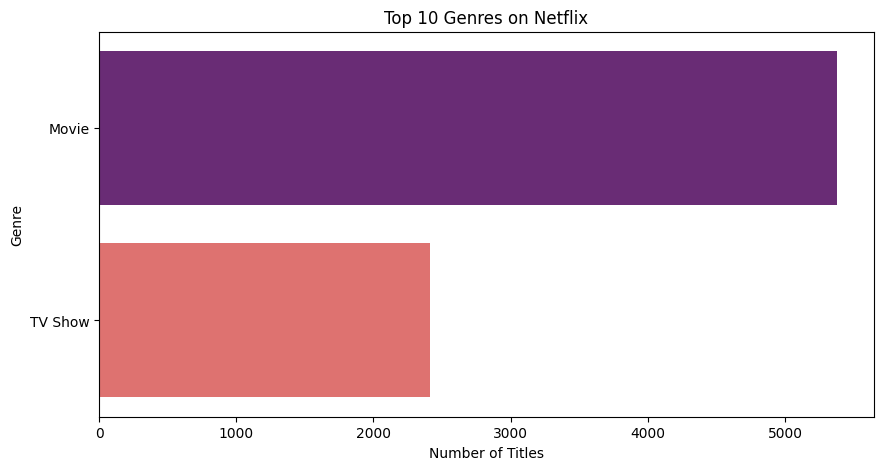


⚠️ No year column found — skipping yearly trend graph.

Summary Insights:
- Total Titles: 7789
- Movies: 3939
- TV Shows: 2319
- Top Genre: Movie
- Top Country: United States


In [6]:
# =====================================
# 📊 Netflix Content Trends Analysis (Fixed Version)
# =====================================

# Step 1: Install Required Libraries
!pip install pandas matplotlib seaborn

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load Dataset
df = pd.read_csv("Netflix Dataset.csv")

print("Preview of Dataset:")
display(df.head())

# Step 4: Check Columns
print("\nAvailable Columns:")
print(df.columns)

# Step 5: Rename common columns for consistency
df.columns = df.columns.str.strip()  # remove spaces

# Handle Genre-like column
if 'Genre' in df.columns:
    genre_col = 'Genre'
elif 'listed_in' in df.columns:
    genre_col = 'listed_in'
elif 'Category' in df.columns:
    genre_col = 'Category'
else:
    genre_col = None

# Handle Type column
if 'Type' not in df.columns:
    # Some datasets use 'type' (lowercase)
    if 'type' in df.columns:
        df.rename(columns={'type': 'Type'}, inplace=True)

# Handle Country column
if 'Country' not in df.columns and 'country' in df.columns:
    df.rename(columns={'country': 'Country'}, inplace=True)

# Handle Release Year column
if 'Release Year' in df.columns:
    year_col = 'Release Year'
elif 'Year' in df.columns:
    year_col = 'Year'
elif 'release_year' in df.columns:
    year_col = 'release_year'
else:
    year_col = None

# =====================================
# Step 6: Data Analysis and Visualization
# =====================================

# 1️⃣ Graph 1: Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df, palette='coolwarm')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# 2️⃣ Graph 2: Top 10 Genres
if genre_col:
    plt.figure(figsize=(10,5))
    genres = df[genre_col].astype(str).value_counts().head(10)
    sns.barplot(x=genres.values, y=genres.index, palette='magma')
    plt.title('Top 10 Genres on Netflix')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()
else:
    print("\n⚠️ Genre column not found — skipping genre analysis.")

# 3️⃣ Graph 3: Content Added Over the Years
if year_col:
    plt.figure(figsize=(10,5))
    df[year_col].value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Content Added to Netflix Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.grid(True)
    plt.show()
else:
    print("\n⚠️ No year column found — skipping yearly trend graph.")

# =====================================
# Step 7: Summary Insights
# =====================================
print("\nSummary Insights:")
print(f"- Total Titles: {len(df)}")
if 'Type' in df.columns:
    print(f"- Movies: {len(df[df['Type'].str.contains('Movie', case=False, na=False)])}")
    print(f"- TV Shows: {len(df[df['Type'].str.contains('TV', case=False, na=False)])}")
if genre_col:
    print("- Top Genre:", df[genre_col].mode()[0])
if 'Country' in df.columns:
    print("- Top Country:", df['Country'].mode()[0])


/tmp/ipython-input-1467605546.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='coolwarm')


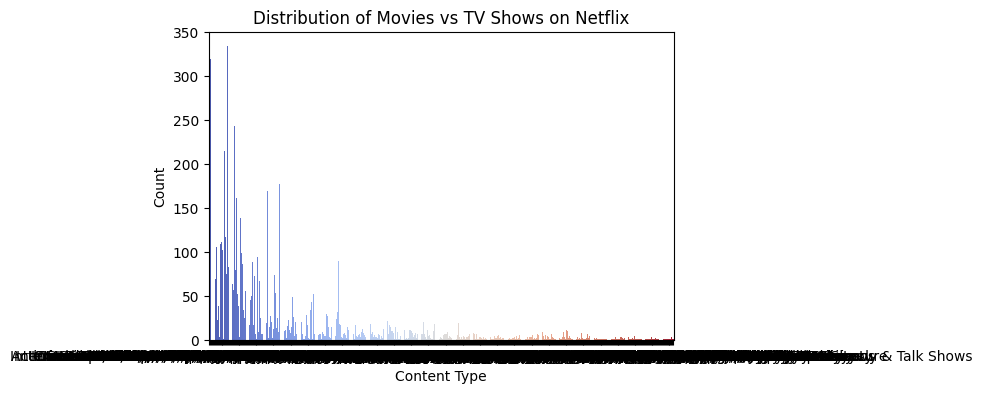

In [7]:
# Step 1: Install Required Libraries
!pip install pandas matplotlib seaborn

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load Dataset
# Make sure the dataset file name matches exactly with your upload
df = pd.read_csv("Netflix Dataset.csv")

# Step 4: Clean Column Names (remove spaces or lowercase)
df.columns = df.columns.str.strip()

# Step 5: Handle case differences (Type or type)
if 'Type' not in df.columns and 'type' in df.columns:
    df.rename(columns={'type': 'Type'}, inplace=True)

# Step 6: Plot Graph — Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df, palette='coolwarm')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

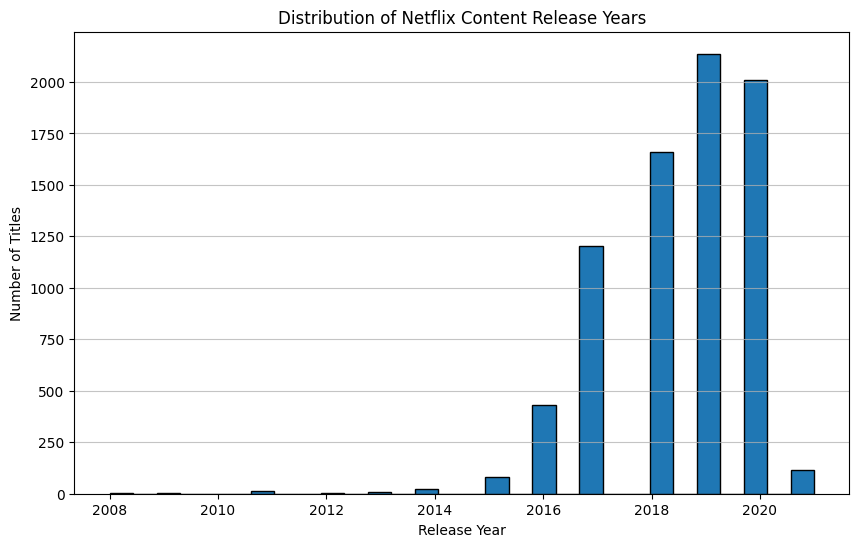

In [12]:
# Extract year from Release_Date for plotting
df['release_year'] = pd.to_datetime(df['Release_Date'], format='%B %d, %Y', errors='coerce').dt.year

# Generate a histogram for the 'release_year' column
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, edgecolor='black')
plt.title('Distribution of Netflix Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', alpha=0.75)
plt.show()